In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objs as go
from plotly import tools
from matplotlib import pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/soccer-players-statistics/FullData.csv


In [2]:
soccer=pd.read_csv("/kaggle/input/soccer-players-statistics/FullData.csv")

In [3]:
soccer.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


In [4]:
soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 53 columns):
Name                  17588 non-null object
Nationality           17588 non-null object
National_Position     1075 non-null object
National_Kit          1075 non-null float64
Club                  17588 non-null object
Club_Position         17587 non-null object
Club_Kit              17587 non-null float64
Club_Joining          17587 non-null object
Contract_Expiry       17587 non-null float64
Rating                17588 non-null int64
Height                17588 non-null object
Weight                17588 non-null object
Preffered_Foot        17588 non-null object
Birth_Date            17588 non-null object
Age                   17588 non-null int64
Preffered_Position    17588 non-null object
Work_Rate             17588 non-null object
Weak_foot             17588 non-null int64
Skill_Moves           17588 non-null int64
Ball_Control          17588 non-null int64
Dribbling      

In [5]:
#Top 20 Countries of Soccer Player Number
import plotly.express as px
x1=list(soccer.Nationality.unique())
y1=list(len(soccer[soccer["Nationality"]==each]) for each in x1)
df=pd.DataFrame()
df["Country"]=x1
df["NumberOfPlayers"]=y1
df_n=df.sort_values("NumberOfPlayers",ascending=False)
fig = px.bar(df_n.head(20), x="NumberOfPlayers", y="Country", orientation='h',title="Top 20 Countries with the Most Players")
fig.show()

In [6]:
from wordcloud import WordCloud

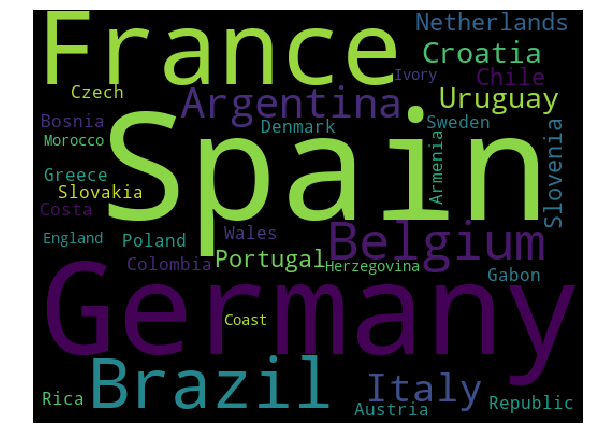

In [7]:
#Country of Origins of Top Rated 100 Players
df_r=soccer.sort_values(by="Rating",ascending=False).head(100)
plt.subplots(figsize=(8,8))
text=""
for i in df_r.Nationality:
    text= text +" " +i
wc=WordCloud(width=512,height=384).generate(text)
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [8]:
#Top Rated Players' Properties
df2=soccer.sort_values(by="Rating",ascending=False).head(20)
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 32
Data columns (total 53 columns):
Name                  20 non-null object
Nationality           20 non-null object
National_Position     18 non-null object
National_Kit          18 non-null float64
Club                  20 non-null object
Club_Position         20 non-null object
Club_Kit              20 non-null float64
Club_Joining          20 non-null object
Contract_Expiry       20 non-null float64
Rating                20 non-null int64
Height                20 non-null object
Weight                20 non-null object
Preffered_Foot        20 non-null object
Birth_Date            20 non-null object
Age                   20 non-null int64
Preffered_Position    20 non-null object
Work_Rate             20 non-null object
Weak_foot             20 non-null int64
Skill_Moves           20 non-null int64
Ball_Control          20 non-null int64
Dribbling             20 non-null int64
Marking               20 non-null int64

In [9]:
df2.Height= df2.Height.apply(lambda x: x.replace(" cm",""))

In [10]:
df2.Weight= df2.Weight.apply(lambda x: x.replace(" kg",""))

In [11]:
df2.Weight =df2.Weight.astype(int)

In [12]:
df2.Height = df2.Height.astype(int)

In [13]:
trace1=go.Scatter(
                    x = df2.Name,
                    y = df2.Rating,
                    mode = "markers",
                    name = "Ratings",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= "Ratings")
trace2=go.Scatter(
                    x = df2.Name,
                    y = df2.Skill_Moves ,
                    mode = "markers",
                    name = "Skill Moves",
                   marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= "Skill Moves")
trace3=go.Scatter(
                    x = df2.Name,
                    y = df2.Ball_Control ,
                    mode = "markers",
                    name = "Ball Control",
                   marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= "Ball Control")
trace5=go.Scatter(
                    x = df2.Name,
                    y = df2.Marking,
                    mode = "markers",
                    name = "Marking",
                   marker = dict(color = 'rgba(0, 0, 128, 0.8)'),
                    text= "Marking")
trace6=go.Scatter(
                    x = df2.Name,
                    y = df2.Acceleration,
                    mode = "markers",
                    name = "Acceleration",
                   marker = dict(color = 'rgba(255, 0, 50, 0.8)'),
                    text= "Acceleration")
data=[trace1,trace2,trace3,trace4,trace5,trace6]
layout = dict(title = 'Properties of Top Rated Players',
              xaxis= dict(title= 'Player Name',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Properties',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

NameError: name 'trace4' is not defined